# 5.2 matplotlib数据可视化


数据分析中一个重要的部分是对信息进行可视化。matplotlib([官网](https://matplotlib.org/))是一个用于生成出版级质量的绘图包。该项目由John Hunter于2002年发起，目的在于在Python环境下进行Matlab（一种针对科学计算的软件）风格的绘图。


![MatplotlibTimeline](image/MatplotlibTimeline.png)

Matplotlib最初由John D. Hunter编写，第一个公开版本于2003年发布。Michael Droettboom在John Hunter于2012年8月去世前不久被提名为matplotlib的首席开发者，Thomas Caswell于2014年加入，他现在(2021年)是首席开发者。

## 1. 一张图片的解剖

![MatplotlibFigureIntro](image/2on1.png)

figure - 图形; 
title - 标题;
tick - 刻度;
axis - 轴;
label - 标签;
line - 线;
scatter plot - 散点图；
grid - 网格;
legend - 图例;
spine -  图脊;

matplotlib图形由多个元素的层次结构组成，当这些元素放在一起时，就形成了实际的图形。任何基本部件的一个重要属性是zorder属性，它在图中指示了基本部件的虚拟深度。这个zorder值用于在渲染基本部件之前从最低到最高排序。这样就可以控制什么在什么的后面。大多数绘图者都创建一个默认的zorder值，这样各个图形部件可以恰当的渲染。例如，图脊、刻度和刻度标签通常在实际图形的后面。

为了方便使用，matplotlib还定义了一些预定义的zorder值，常用的有以下几种：
|图形部件|zorder值|用途|
|---|---|---|
|`legend`|5|用于表示图例。|
|`text`|3|用于表示图形中的文本标签。|
|`line`|2|用于表示图形中的线条，如直线、曲线等。|
|`patch`|1|用于表示图形中的填充区域，如矩形、圆形等。|

这些预定义的zorder值可以在绘图时直接使用，也可以通过设置zorder属性来自定义其他值。通过合理设置zorder属性，可以控制图形元素的叠加顺序，从而实现更灵活的图形绘制。

## 2. matplotlib库的安装

请在jupyter-lab新建一个Terminal（终端），输入命令如下：
```bash
pip install matplotlib --user -i https://mirrors.aliyun.com/pypi/simple
```



其中，`https://mirrors.aliyun.com/pypi/simple`为指定pypi镜像地址，加快下载速度。在安装的过程中，如果需要打断或者终止以上命令，使用`ctrl+c`。

### 练习：安装matplotlib库
1. 安装matplotlib库
2. 使用`import`关键词来加载matplotlib库

## 3. 一个标准绘图流程
### [1]初始化(initialize)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### [2]准备(prepare)


In [2]:
X = np.linspace(0, 8*np.pi, 1000)  #np.pi 圆周率
Y = np.sin(X)

### [3] 渲染(Render)


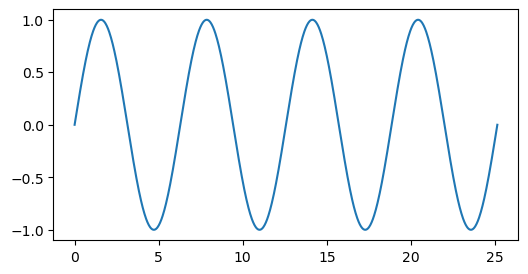

In [3]:
fig, ax = plt.subplots(figsize=(6,3))   # 很重要！！！ 生成一个空的图形 
ax.plot(X, Y, '-')         # 绘制别的图形，只需要修改这里
plt.show()                # 很重要！！！显示绘制的图形

### 练习
参照上述3个步骤绘制曲线 $y = x^2 + 2$

## 3. 图形大小

Matplotlib中的原始图形尺寸单位是英寸，源自印刷行业标准。但是，用户可能需要以厘米或像素等其他单位指定图形。

在`plt.subplots`里添加figsize参数，控制图形大小，figsize是一个tuple类型的参数（长和宽）

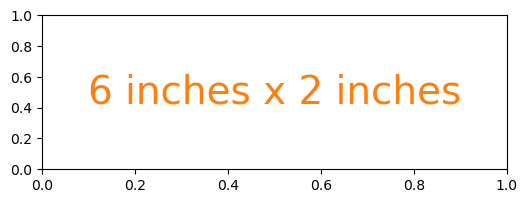

In [4]:
plt.subplots(figsize=(6, 2))
text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
plt.text(0.5, 0.5, '6 inches x 2 inches', **text_kwargs)
plt.show()

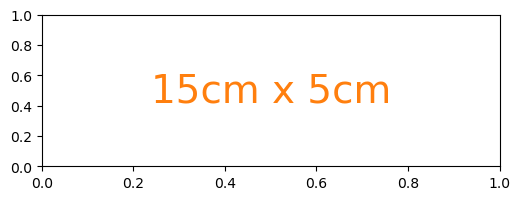

In [5]:
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(15*cm, 5*cm))
plt.text(0.5, 0.5, '15cm x 5cm', **text_kwargs)
plt.show()

关于尺寸，可以阅读: [Figure size in different units](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html)

## 4. 微调样式

你可以修改图形中的任何内容，包括颜色、标记、线条宽度和样式、刻度和刻度标签、标题等。

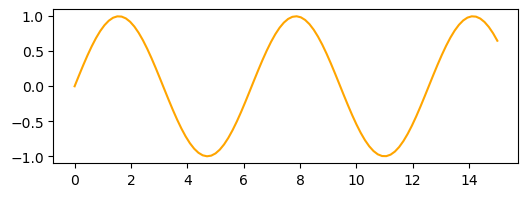

In [6]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y, color='orange')
plt.show()

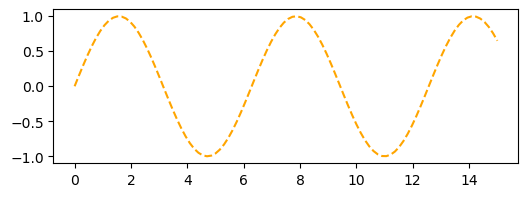

In [7]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y, color='orange', linestyle='--')
plt.show()

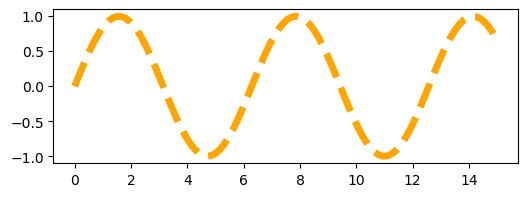

In [8]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y, color='orange', linestyle='--', linewidth=5)
plt.show()

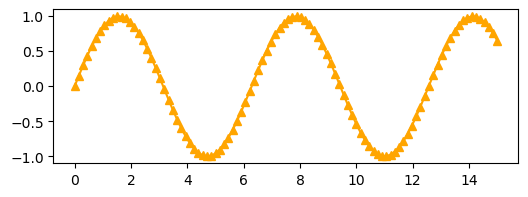

In [9]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y, color='orange',  marker="^")
plt.show()

## 5. 组织多个变量

你可以在同一个图形里绘制多个数据，当然，你也可以将一个图形分割成多个子图。

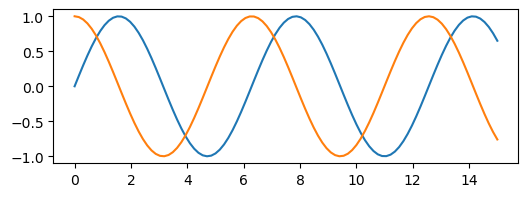

In [10]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y1)
ax.plot(X, Y2)
plt.show()

```
nrows - 子图的行数
ncols - 子图的列数
```

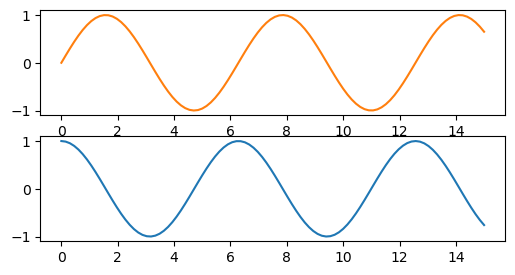

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,3)) 
X = np.linspace(0, 15, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax[0].plot(X, Y1, color='C1')
ax[1].plot(X, Y2, color='C0')
plt.show()

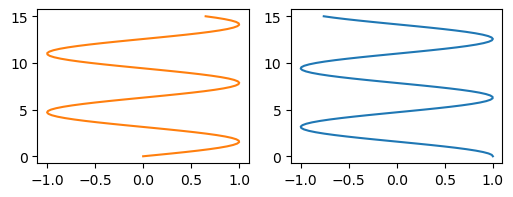

In [12]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(6,2))
X = np.linspace(0, 15, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax1.plot(Y1, X, color='C1')
ax2.plot(Y2, X, color='C0')
plt.show()

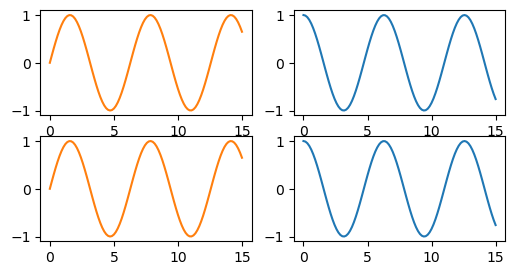

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,3)) 
X = np.linspace(0, 15, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax[0, 0].plot(X, Y1, color='C1')
ax[0, 1].plot(X, Y2, color='C0')
ax[1, 0].plot(X, Y1, color='C1')
ax[1, 1].plot(X, Y2, color='C0')
plt.show()

## 6. 添加标题和坐标轴的标签

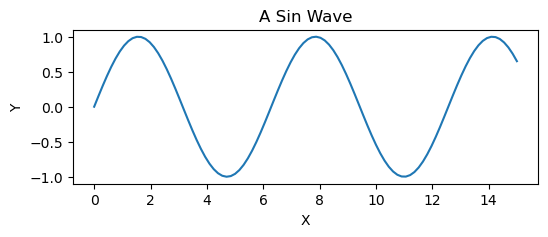

In [14]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y)
ax.set_title('A Sin Wave')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

## 7. 添加图例

首先，在绘图语句中添加`label='图型名称'`,然后使用`ax.legend(loc='best')`语句。loc参数可选：'best'，'upper right' ，'upper left'  ，'lower left'，'lower right' ，'right'       ，'center left' ，'center right'，'lower center'，'upper center'，'center'。

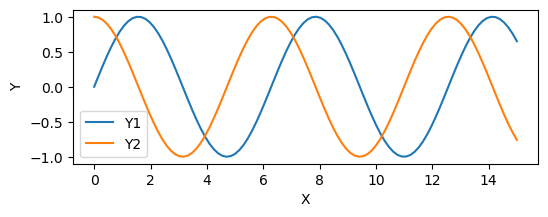

In [15]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y1, label='Y1')   # 这里需要添加图形名称 label='Y1'
ax.plot(X, Y2, label='Y2')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.legend(loc='best')     # 显示图例
plt.show()

## 8. 添加文本


有时候，我们需要在图形上添加文本标注。在pyplot模块里，使用pyplot.text()函数能够在任意位置添加文本，其语法如下：
```python
matplotlib.pyplot.text(x, y, s)
```
```
x：横轴数据
y：纵轴数据
s：需要标注的文本
```

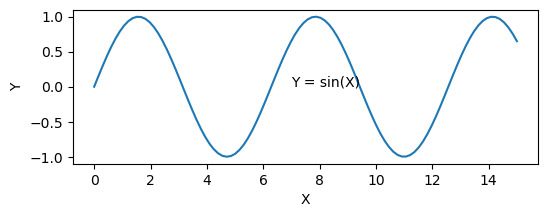

In [16]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y)
ax.text(7, 0, 'Y = sin(X)')  #添加文本，位置为(7,0)，文本内容为'Y = sin(X)'
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

## 9. 添加网格线

在Matplotlib中，你可以使用grid()函数来添加网格线，默认情况下，网格线是关闭的。

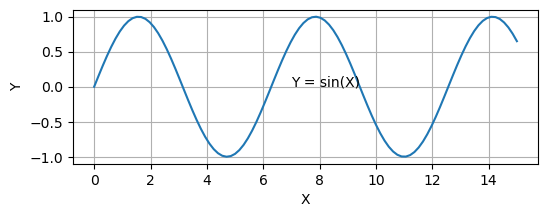

In [17]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y)
ax.text(7, 0, 'Y = sin(X)') 
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.grid()           # 设置网格线
plt.show()

## 10. 保存图片到文件
你可以使用`plt.savefig`将绘制的图片从内存保存到文件。例如将图片保存为jpg格式，你只需要输入以下代码：
```python
plt.savefig('figpath/fig_name.jpg')
```
有几个重要的选项，如dpi，它控制每英寸点数的分辨率。
```python
plt.savefig('figpath/fig_name.jpg', dpi=400)
```
保存的格式支持'png', 'jpg', 'pdf', 'svg', 'ps', 'eps', ...

通过运行下面命令可以了解当前当前的dpi值

In [18]:
print("当前的dpi值：%i" %(plt.rcParams['figure.dpi']))       # 获取当前的dpi值

当前的dpi值：100


对于6 inches x 2 inches的图形，来说其基于点数dpi的分辨率为：

In [19]:
print("基于点数的分辨率：%i*%i" %(plt.rcParams['figure.dpi']*6, plt.rcParams['figure.dpi']*2))      

基于点数的分辨率：600*200


## 11. 在jupyter绘图过程中显示无损图形

如果想要在当前的jupyter页面绘制图形时，显示无损格式，可以设置了输出图形的格式为SVG（Scalable Vector Graphics）。SVG是一量图形格式，可以无损地缩放和放大，适用于在不同分辨率的设备上显示。

使用SVG格式前：

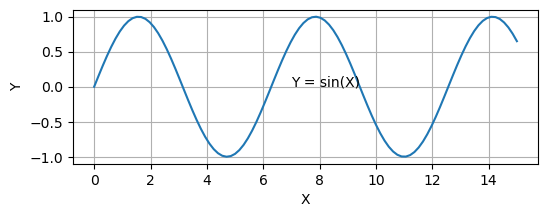

In [20]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y)
ax.text(7, 0, 'Y = sin(X)')  #添加文本，位置为(7,0)，文本内容为'Y = sin(X)'
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.grid()
plt.show()

使用SVG格式后：

In [21]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

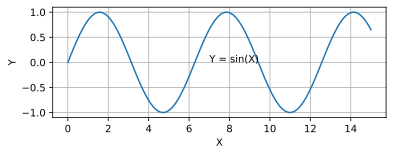

In [22]:
fig, ax = plt.subplots(figsize=(6,2))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y)
ax.text(7, 0, 'Y = sin(X)')  #添加文本，位置为(7,0)，文本内容为'Y = sin(X)'
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.grid()
plt.show()

### 练习：绘制折线图
1. 使用pandas库读取世界幸福报告数据集，路径为：'datasets/world-happiness-report-china.csv'，读取完赋值给变量df
1. 横坐标变量X为'年份'， 纵坐标变量Y为'幸福指数'
1. 图片尺寸大小：6英寸*3英寸
1. 绘制幸福指数随年份变化的折线图，数据点的标记为'^'，颜色为'orange'
1. 设置标题为'中国幸福报告指数（2006-2020）'
1. 设置图例，位置为左上角
1. 保存图片为'中国幸福报告指数（2006-2020）.png'，dpi设置为200
1. 观察上述图形，能得到什么信息


## 附录
### 像素
**像素**（pixels）是计算机图形学中的一个概念，它是图像的最小单位。像素是由一个数字表示的，该数字代表了图像在该位置的颜色或亮度值。

**分辨率**（resolution）通常以像素为单位来衡量，表示在给定区域内水平和垂直方向上的像素数量。

“像素/英寸”（**PPI**）或“像素/厘米”（**DPI**）表示图像中每英寸（或每厘米）的像素数量。较高的分辨率意味着图像具有更多的像素，细节更加清晰和精细。

对于显示器或屏幕，分辨率表示屏幕上水平和垂直方向上的像素数量。例如，常见的显示器分辨率有1920x1080（也称为1080p）或2560x1440（也称为2K）等。较高的分辨率意味着屏幕可以显示更多的细节和更高的图像质量。


### 图片的多种格式
Matplotlib可以保存图片为多种格式，其中一些无损格式包括：

1. **PNG**（Portable Network Graphics）：PNG是一种无损的位图图像格式，支持透明度和高质量的图像压缩。相比于有损格式如JPEG，PNG格式不会引入压缩损失，因此被认为是一种无损格式。可以使用`plt.savefig('figure.png')`保存为PNG格式。

2. **PDF**（Portable Document Format）：PDF是一种无损的矢量图像格式，可以保留图像的矢量信息和高质量的图像细节。可以使用`plt.savefig('figure.pdf')`保存为PDF格式。

3. **SVG**（Scalable Vector Graphics）：SVG是一种无损的矢量图像格式，可以无损地缩放和编辑图像。可以使用`plt.savefig('figure.svg')`保存为SVG格式。

这些无损格式可以保留图像的细节和质量，适用于需要高保真度的图像保存。

### 绘图的常见概念和术语
在绘图领域，有一些常见的概念和术语，包括：

1. 坐标系（Coordinate System）：用于确定绘图区域的坐标系，通常包括水平轴（x轴）和垂直轴（y轴）。常见的坐标系有笛卡尔坐标系和极坐标系。

2. 图表类型（Chart Types）：用于展示不同类型数据的图表，如折线图、柱状图、散点图、饼图、箱线图等。每种图表类型都有其特定的用途和表达方式。

3. 数据系列（Data Series）：指图表中的一组相关数据，可以是一组数值、一组分类标签或其他类型的数据。在绘制图表时，通常需要指定数据系列。

4. 标签（Labels）：用于标识图表中的元素，如坐标轴标签、数据点标签、图例标签等。标签可以提供额外的信息，使图表更易读和理解。

5. 图例（Legend）：用于解释图表中不同数据系列的符号或颜色的说明。图例通常位于图表的一角，帮助读者理解图表中的数据含义。

6. 刻度（Ticks）：用于标记坐标轴上的数值或分类标签的小线段。刻度可以帮助读者准确地读取和解释图表中的数据。

7. 网格线（Grid Lines）：用于在绘图区域中创建水平和垂直的参考线，帮助读者对齐和比较数据。

8. 注释（Annotations）：用于在图表中添加额外的文字或图形，以提供更详细的信息或突出特定的数据点。

这些概念和术语在绘图中起到重要的作用，了解它们可以帮助您更好地理解和创建图表。


### 练习：绘制折线图
1. 使用pandas库读取世界幸福报告数据集，路径为：'datasets/world-happiness-report-china.csv'，读取完赋值给变量df
1. 横坐标变量X为'年份'， 纵坐标变量Y为'幸福指数'
1. 图片尺寸大小：6英寸**3英寸
1. 绘制幸福指数随年份变化的折线图，数据点的标记为'^'，颜色为'orange'
1. 设置标题为'中国幸福报告指数（2006-2020）'
1. 设置图例，位置为左上角
1. 保存图片为'中国幸福报告指数（2006-2020）.png'，dpi设置为200
1. 观察上述图形，能得到什么信息


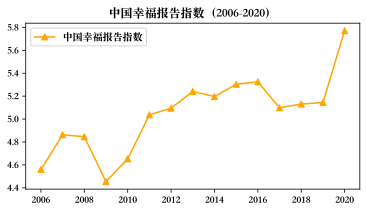

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'#'SimHei' 
df = pd.read_csv('datasets/world-happiness-report-china.csv')
X = df['年份']
Y = df['幸福指数']
fig, ax = plt.subplots(figsize=(6,3))   
ax.plot(X, Y, color='orange',  marker="^", label='中国幸福报告指数')         # 绘制折线图
ax.set_title('中国幸福报告指数（2006-2020）')
ax.legend(loc='upper left')
plt.savefig('中国幸福报告指数（2006-2020）.png', dpi=300)



## 参考

- Nicolas P.Rougier, Scientific Visualization: Pyhon & Matplotlib[M], https://github.com/rougier/scientific-visualization-book/
- matplotlib的绘图示例：https://matplotlib.org/stable/gallery/index.html